In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import string
import seaborn as sn

In [2]:
dataset = pd.read_csv("Flavia_features.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639688,0.997666,0.911738,1.688689
1,0,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440064,0.998419,0.914331,1.673914
4,0,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641447,0.998568,0.898644,1.968081


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
maindir = r'C:\Users\Shubham Mavaskar\Desktop\My Project'
ds_path = "Leaves"
img_files = os.listdir(ds_path)

In [6]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [7]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [8]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [9]:
X = dataset.iloc[:,1:]

In [10]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639688,0.997666,0.911738,1.688689
1,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440064,0.998419,0.914331,1.673914
4,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641447,0.998568,0.898644,1.968081


In [11]:
y[0:5]

array([0, 0, 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train, X_val, X_test)

           area    perimeter  physiological_length  physiological_width  \
1265   264206.5  3494.263523                  1369                  876   
719    581838.0  3304.345568                  1281                  710   
47         11.5    25.213203                     9                   10   
397    542317.5  4241.406530                  1083                  973   
1644   685010.0  3725.565916                  1139                  929   
...         ...          ...                   ...                  ...   
1329  1012459.5  4400.980125                  1489                 1067   
1468   590070.0  3824.349750                  1462                  888   
1186   450960.0  3962.686978                  1515                 1043   
1370   855979.0  3962.394337                  1385                  964   
1430   468241.0  4010.055370                  1454                 1024   

      aspect_ratio  rectangularity  circularity     mean_r     mean_g  \
1265      1.562785        

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [15]:
X_train.head(5)


,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1265,264206.5,3494.263523,1369,876,1.562785,4.539040,46.213388,11.376662,21.234646,8.554989,32.281313,52.825394,27.394474,11.775677,0.997775,0.879416,2.317949
719,581838.0,3304.345568,1281,710,1.804225,1.563167,18.765876,25.070269,50.339131,13.916806,44.822141,76.611512,30.545878,29.355717,0.996316,0.736811,4.634661
47,11.5,25.213203,9,10,0.900000,7.826087,55.278748,10.146755,17.972950,8.554042,32.396968,47.321379,30.616253,12.842505,0.997724,0.890439,2.104303
397,542317.5,4241.406530,1083,973,1.113052,1.943067,33.171582,26.086966,48.110169,17.650424,43.839197,75.737598,32.447698,15.951844,0.997692,0.763857,4.063750
1644,685010.0,3725.565916,1139,929,1.226050,1.544694,20.262246,31.909946,57.724894,19.984481,48.891088,77.138904,35.353331,15.974427,0.998151,0.713676,5.114103


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
X_train[0:2]

array([[-1.28176361, -0.30033398,  0.24555865, -0.01102278, -0.06293625,
         0.37408453,  0.30370883, -0.65386914, -0.87353958, -0.52158232,
        -0.83415247, -0.96500657, -0.51837843, -0.57182135,  0.47458012,
         1.33938541, -1.32359204],
       [-0.07632002, -0.54414658, -0.12154243, -0.71101922,  0.34502057,
        -0.30901034, -0.35301851, -0.29984128, -0.22962775, -0.37659595,
        -0.06452387,  0.40088133, -0.36253164,  0.08344034, -0.21628628,
        -0.08151934,  0.11167994]])

In [19]:
y_train[0:2]

array([20, 11])

In [20]:
from sklearn import svm


In [21]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.7801047120418848

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

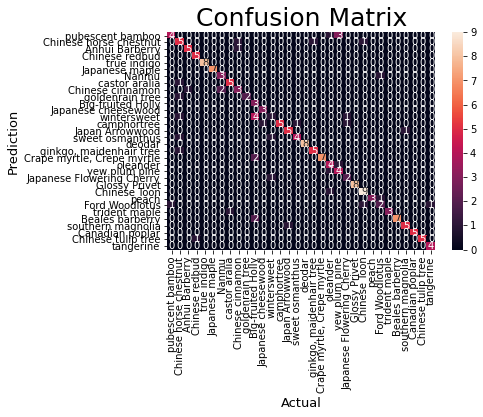

In [26]:
sn.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'],
            yticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=25)
plt.show()
 

In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.50      0.62      0.56         8
           2       0.83      0.83      0.83         6
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       0.60      0.75      0.67         4
           7       0.83      0.83      0.83         6
           8       0.60      0.50      0.55         6
           9       1.00      0.67      0.80         3
          10       0.27      1.00      0.43         3
          11       0.75      1.00      0.86         3
          12       0.33      0.14      0.20         7
          13       1.00      0.62      0.77         8
          14       0.83      0.83      0.83         6
          15       0.80      0.67      0.73         6
          16       1.00      1.00      1.00         8
          17       0.83    

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()

In [29]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [30]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [31]:
svm_clf.best_params_

{'C': 100, 'kernel': 'linear'}

In [32]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.055 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.206 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.615 (+/-0.036) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.830 (+/-0.023) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.852 (+/-0.029) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.858 (+/-0.030) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.206 (+/-0.008) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.622 (+/-0.030) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.836 (+/-0.030) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.892 (+/-0.023) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.889 (+/-0.034) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.872 (+/-0.026) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.624 (+/-0.035) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.826 (+/-0.026) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.888 (+/-0.039) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.891 (+/-0.027) for {'C': 100, 'gamma': 0.1, 'kernel':

In [33]:
y_pred_svm = svm_clf.predict(X_test)

In [34]:
accuracy = metrics.accuracy_score(y_test, y_pred_svm)
accuracy

0.9162303664921466

In [35]:
cm1 = confusion_matrix(y_test, y_pred_svm)
cm1

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 6, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [36]:
# WIDTH_SIZE  = 500
# HEIGHT_SIZE = 500
# figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))

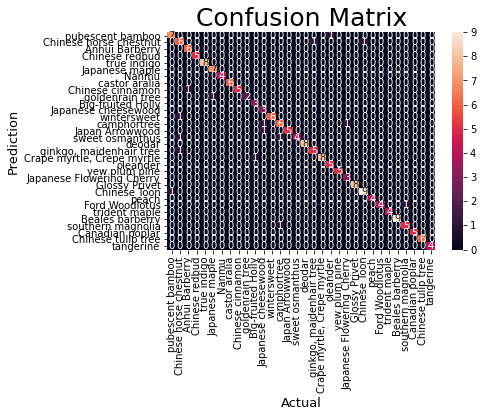

<Figure size 1080x576 with 0 Axes>

In [37]:
sn.heatmap(cm1, 
            annot=True,
            fmt='g', 
            xticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'],
            yticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=25)
plt.figure(figsize=(15,8))
plt.show()




In [38]:
print(metrics.classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.67      0.75      0.71         8
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       0.88      1.00      0.93         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      0.83      0.91         6
           9       1.00      0.67      0.80         3
          10       0.75      1.00      0.86         3
          11       0.60      1.00      0.75         3
          12       1.00      0.86      0.92         7
          13       0.75      0.75      0.75         8
          14       1.00      0.83      0.91         6
          15       1.00      0.67      0.80         6
          16       1.00      1.00      1.00         8
          17       0.83    

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()

In [41]:
pca.fit(X)

PCA()

In [42]:
var= pca.explained_variance_ratio_
var

array([9.99992850e-01, 6.46252547e-06, 3.92421104e-07, 2.07420965e-07,
       6.10351124e-08, 1.36319644e-08, 8.97309526e-09, 2.57948567e-09,
       8.58148044e-10, 2.05591984e-10, 1.06493821e-10, 1.30658857e-11,
       2.26591998e-12, 1.38328640e-12, 5.57713116e-13, 3.37431048e-15,
       1.00979877e-17])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

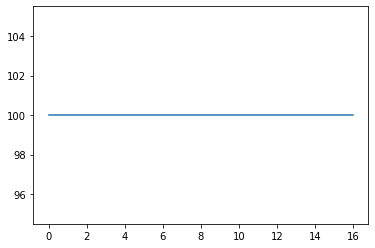

In [44]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [45]:
import os
import cv2

In [46]:
def bg_sub(filename):
    test_img_path = 'standardleaves\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
        
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [47]:
filename = '16.jpg' 
bg_rem_img = bg_sub(filename)

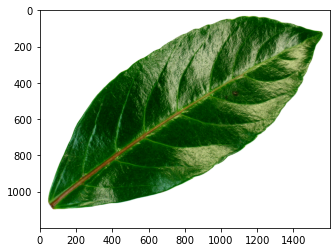

In [48]:
plt.imshow(bg_rem_img)

In [49]:
import mahotas as mt

In [50]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
    
    
    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [51]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,909779.0,4237.202559,1513,1061,1.426013,1.764487,19.734337,23.345395,46.686349,15.251757,45.820891,57.238536,33.431377,150.105369,0.991704,0.591477,7.042055


In [52]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 1.16824916e+00  6.53435211e-01  8.46269505e-01  7.69093736e-01
  -2.94037800e-01 -2.62798545e-01 -3.29846464e-01 -3.44435322e-01
  -3.10442433e-01 -3.40498186e-01 -3.23071980e-03 -7.11587477e-01
  -2.19834648e-01  4.58414810e+00 -2.40000157e+00 -1.52962123e+00
   1.60313157e+00]]


14

In [53]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Japan Arrowwood'